###Exploring Efficacy of Different Machine Learning Models in Detecteing Breast Cancver Malignancy Based on Cellular Characteristics
Colin Dailey

##Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<br>

##Read in CSV and observe original data

In [2]:
df = pd.read_csv('breast_cancer_wisconsin.csv')

Wolberg, WIlliam. (1992). Breast Cancer Wisconsin (Original). UCI Machine Learning Repository. https://doi.org/10.24432/C5HP4Z.

### Data Dictionary:
1. Sample code number:            ID number
2. Clump Thickness:               1 - 10
3. Uniformity of Cell Size:       1 - 10
4. Uniformity of Cell Shape:      1 - 10
5. Marginal Adhesion:             1 - 10
6. Single Epithelial Cell Size:   1 - 10
7. Bare Nuclei:                   1 - 10
8. Bland Chromatin:               1 - 10
9. Normal Nucleoli:               1 - 10
10. Mitoses:                      1 - 10
11. Class:                        (2 for benign, 4 for malignant)

(Wolberg, 1992)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
df.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


Columns will be renamed for supervised learning based on the data dictionary. Also, column 6, though numerical in nature, is an object data type indicating that cleaning is needed.

<br>

##Cleaning and Validation...

In [6]:
# ID duplicates
dup_mask = df.duplicated()
print(f'There are {dup_mask.sum()} duplicates')

There are 8 duplicates


In [7]:
# Drop duplicates
print('There are', df.shape[0], 'rows before')
df = df.drop_duplicates()
print('There are', df.shape[0], 'rows after')

There are 699 rows before
There are 691 rows after


In [8]:
# Column 6 contains '?' values that must be removed
df['6'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [9]:
df = df[df['6'] != '?']

Column 6's "?" values were converted to NaN values, then the rows were dropped. This was done in order to make column 6 rows consistant with one data type. Rows were dropped rather than replaced with a median or special value because of the categorical, ordinal nature of the feature columns.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       675 non-null    int64 
 1   1       675 non-null    int64 
 2   2       675 non-null    int64 
 3   3       675 non-null    int64 
 4   4       675 non-null    int64 
 5   5       675 non-null    int64 
 6   6       675 non-null    object
 7   7       675 non-null    int64 
 8   8       675 non-null    int64 
 9   9       675 non-null    int64 
 10  10      675 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 63.3+ KB


In [11]:
# Drop ID column (May cause ML models to identify non-existent patterns)
df = df.drop(['0'], axis=1)

Rename and drop all columns for supervised learning...

In [12]:
# Create labeled columns
df[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
   'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']] = df[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]

In [13]:
# Drop original unlabeled columns
df = df.drop(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], axis=1)

In [14]:
# Replace 2's with 'benign' and 4's with 'malignant' in the Class column
df['Class'] = df['Class'].replace(2, 'benign')
df['Class'] = df['Class'].replace(4, 'malignant')

In [15]:
# Convert 'Bare Nuclei' from object to integer column
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)

In [16]:
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,benign
1,5,4,4,5,7,10,3,2,1,benign
2,3,1,1,1,2,2,3,1,1,benign
3,6,8,8,1,3,4,3,7,1,benign
4,4,1,1,3,2,1,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,benign
695,2,1,1,1,2,1,1,1,1,benign
696,5,10,10,3,7,3,8,10,2,malignant
697,4,8,6,4,3,4,10,6,1,malignant


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              675 non-null    int64 
 1   Uniformity of Cell Size      675 non-null    int64 
 2   Uniformity of Cell Shape     675 non-null    int64 
 3   Marginal Adhesion            675 non-null    int64 
 4   Single Epithelial Cell Size  675 non-null    int64 
 5   Bare Nuclei                  675 non-null    int64 
 6   Bland Chromatin              675 non-null    int64 
 7   Normal Nucleoli              675 non-null    int64 
 8   Mitoses                      675 non-null    int64 
 9   Class                        675 non-null    object
dtypes: int64(9), object(1)
memory usage: 58.0+ KB


<br>

##Random Forest

In [18]:
# Split data into features and target
X = df.drop(['Class'], axis=1)
y = df['Class']

In [19]:
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [20]:
y

0         benign
1         benign
2         benign
3         benign
4         benign
         ...    
694       benign
695       benign
696    malignant
697    malignant
698    malignant
Name: Class, Length: 675, dtype: object

In [21]:
# Split data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=13)

Grid search to find best hyperparameters

In [22]:
# This code can be commented out for better runtime

# Grid search for Random Forest

param_grid = {'n_estimators': np.arange(1, 100, 20),
              'max_depth': np.arange(1, 200, 20),
              'min_samples_leaf': np.arange(1, 4, 1)}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, verbose=2)

grid.fit(Xtrain, ytrain)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] END ....max_depth=1, min_samples_leaf=1, n_estimators=1; total time=   0.0s
[CV] END ....max_depth=1, min_samples_leaf=1, n_estimators=1; total time=   0.0s
[CV] END ....max_depth=1, min_samples_leaf=1, n_estimators=1; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=21; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=21; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=21; total time=   0.0s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=41; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=41; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=41; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=61; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n_estimators=61; total time=   0.1s
[CV] END ...max_depth=1, min_samples_leaf=1, n

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181]),
                         'min_samples_leaf': array([1, 2, 3]),
                         'n_estimators': array([ 1, 21, 41, 61, 81])},
             verbose=2)

In [23]:
grid.best_score_

0.9660969120374103

In [24]:
grid.best_params_

{'max_depth': 21, 'min_samples_leaf': 2, 'n_estimators': 61}

In [25]:
# This code can be commented out for better runtime

# Grid search for Random Forest

param_grid = {'n_estimators': np.arange(20, 40, 2),
              'max_depth': np.arange(140, 160, 2),
              'min_samples_leaf': np.arange(1, 2, 1)}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, verbose=2)

# We'll use just the training data, so that we can evaluate the best
# model against data that was unseen during training.
grid.fit(Xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END .max_depth=140, min_samples_leaf=1, n_estimators=20; total time=   0.0s
[CV] END .max_depth=140, min_samples_leaf=1, n_estimators=20; total time=   0.0s
[CV] END .max_depth=140, min_samples_leaf=1, n_estimators=20; total time=   0.0s
[CV] END .max_depth=140, min_samples_leaf=1, n_estimators=22; total time=   0.0s
[CV] END .max_depth=140, min_samples_leaf=1, n_estimators=22; total time=   0.0s
[CV] END .max_depth=140, min_samples_leaf=1, n_estimators=22; total time=   0.0s
[CV] END .max_depth=140, min_samples_leaf=1, n_estimators=24; total time=   0.0s
[CV] END .max_depth=140, min_samples_leaf=1, n_estimators=24; total time=   0.0s
[CV] END .max_depth=140, min_samples_leaf=1, n_estimators=24; total time=   0.1s
[CV] END .max_depth=140, min_samples_leaf=1, n_estimators=26; total time=   0.1s
[CV] END .max_depth=140, min_samples_leaf=1, n_estimators=26; total time=   0.1s
[CV] END .max_depth=140, min_samples_leaf=1, n

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([140, 142, 144, 146, 148, 150, 152, 154, 156, 158]),
                         'min_samples_leaf': array([1]),
                         'n_estimators': array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38])},
             verbose=2)

In [26]:
grid.best_score_

0.9660969120374103

In [27]:
grid.best_params_

{'max_depth': 154, 'min_samples_leaf': 1, 'n_estimators': 22}

In [28]:
# Fit model with grid searched parameters
model = RandomForestClassifier(n_estimators=24, max_depth=152, min_samples_leaf=1)
model.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=152, n_estimators=24)

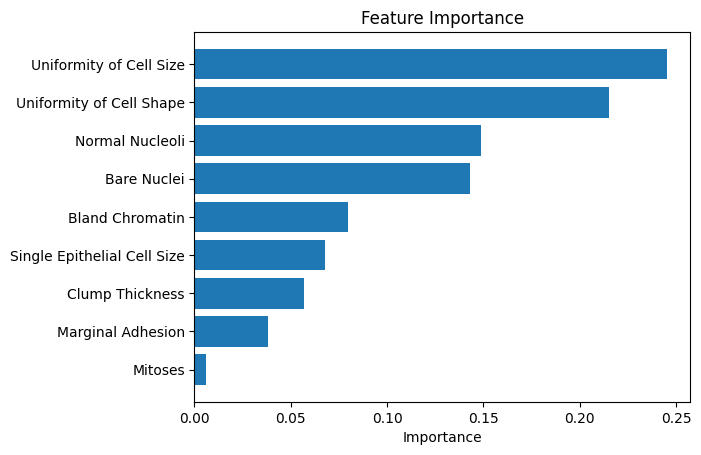

In [29]:
# See which features are most important after training

# Make a DataFrame for ease of sorting and visualization
feat_imp = pd.DataFrame({'Feature': X.columns,'Importance': model.feature_importances_})

feat_imp = feat_imp.sort_values(by='Importance', ascending=True)

fig, ax = plt.subplots()

# horizontal bar charts can make text easier to read
ax.barh(feat_imp['Feature'], feat_imp['Importance'])
ax.set_xlabel('Importance')
ax.set_title('Feature Importance');

In [30]:
ypred = model.predict(Xtest)

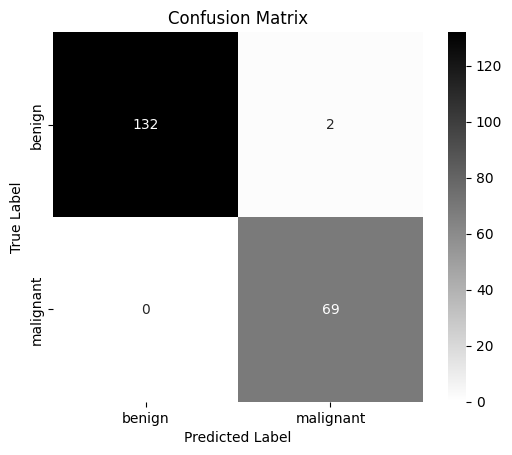

In [31]:
labels = ytrain.unique()
cm = confusion_matrix(ytest, ypred, labels=labels)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                    cmap="gray_r",
                    xticklabels=labels,
                    yticklabels=labels)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [32]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

      benign       1.00      0.99      0.99       134
   malignant       0.97      1.00      0.99        69

    accuracy                           0.99       203
   macro avg       0.99      0.99      0.99       203
weighted avg       0.99      0.99      0.99       203

